<a href="https://colab.research.google.com/github/newtonfalbo/Machine-Learning/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,659,146 (6.33 MB)

 Trainable params: 1,659,146 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 423s 281ms/step - accuracy: 0.8866 - loss: 0.3681 - val_accuracy: 0.9847 - val_loss: 0.0512 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 430s 273ms/step - accuracy: 0.9760 - loss: 0.0783 - val_accuracy: 0.9863 - val_loss: 0.0439 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 444s 274ms/step - accuracy: 0.9807 - loss: 0.0628 - val_accuracy: 0.9894 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 442s 274ms/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9885 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 450s 279ms/step - accuracy: 0.9895 - loss: 0.0352 - val_accuracy: 0.9894 - val_loss: 0.0439 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 430s 271ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9908 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 441s 

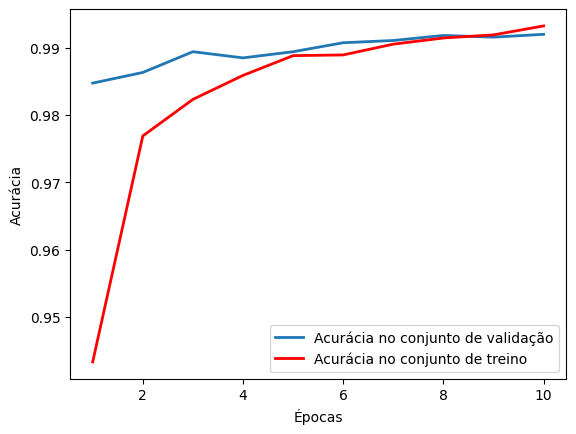

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical # Import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt


# Assuming you are working with MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## dado que o range de valores possível para um pixél vai de 0-255
## escalonamos os valores entre 0-1
## esse processo torna nosso modelo menos variante a pequenas alterações
x_train = x_train / 255
x_test = x_test / 255

# Add a channel dimension to the input data
x_train = x_train.reshape(-1, 28, 28, 1)

# Rest of your code remains the same
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
## usada na camada de saída do classificador, onde realmente estamos tentando
## gerar as probabilidades para definiar a classe de cada entrada

optimi = Adam()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# reduz o parâmetro de learning rate se não houver
# melhoras em determinado número de epocas
# útil para encontrar o mínimo global
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', # Changed to val_accuracy
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
batch_size = 32
epochs = 10

# Convert y_train to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_split=0.2, verbose=1, callbacks=[learning_rate_reduction])

history_dict = history.history
acc = history_dict['accuracy'] # Changed to accuracy
val_acc = history_dict['val_accuracy'] # Changed to val_accuracy
range_epochs = range(1, len(acc) + 1) # Changed Len to len

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()